In [103]:
# Import packages
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import solvers
import scipy
import pandas as pd

In [5]:
# Define the optimization problem for Table production problem
# Define the variables
X = cp.Variable() # number of basic tables
Y = cp.Variable() # number of deluxe tables

obj = 200*X + 350*Y
constraints = [X <=50,\
               Y <=35,\
               5*X + 5*Y <= 300,\
               0.6*X + 1.5*Y <= 63,\
               X >= 0, Y >= 0]
prob = cp.Problem(cp.Maximize(obj), constraints)

prob.solve()
# prob.solve(verbose=True)

# Print result.
print("\nThe maximum profit is", prob.value)
print("We produce {} basic tables and {} deluxe tables.".format(X.value,Y.value))


The maximum profit is 16499.999999350166
We produce 29.99999999591339 basic tables and 30.00000000047854 deluxe tables.


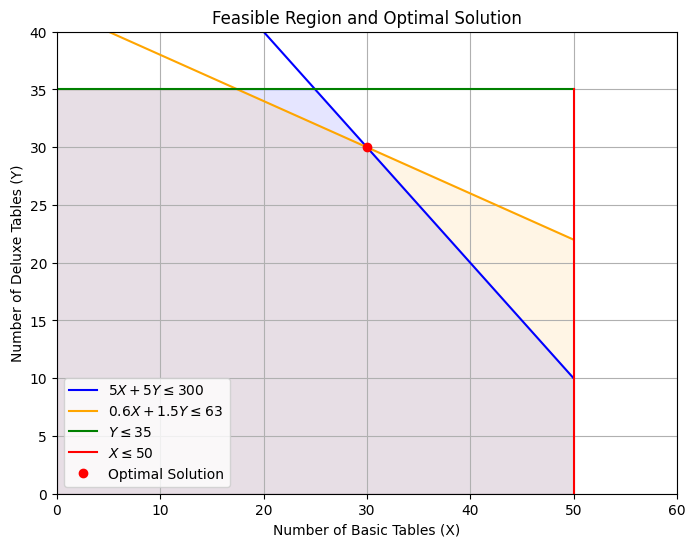

In [25]:
# Plotting the feasible region
x_values = np.linspace(0, 50, 100)
y_values1 = (300 - 5 * x_values) / 5
y_values2 = (63 - 0.6 * x_values) / 1.5

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values1, label=r'$5X + 5Y \leq 300$', color='blue')
plt.fill_between(x_values, np.minimum(y_values1, 35), 0, color='blue', alpha=0.1)
plt.plot(x_values, y_values2, label=r'$0.6X + 1.5Y \leq 63$', color='orange')
plt.fill_between(x_values, np.minimum(y_values2, 35), 0, color='orange', alpha=0.1)
plt.plot([0, 50], [35, 35], label=r'$Y \leq 35$', color='green')
plt.plot([50, 50], [0, 35], label=r'$X \leq 50$', color='red')

# Plotting the objective function
plt.plot(X.value, Y.value, 'ro', label='Optimal Solution')
plt.xlabel('Number of Basic Tables (X)')
plt.ylabel('Number of Deluxe Tables (Y)')
plt.title('Feasible Region and Optimal Solution')
plt.xlim(0, 60)
plt.ylim(0, 40)
plt.legend()
plt.grid(True)
plt.show()

# fig.savefig("fig1.pdf")


In [68]:
R1 = cp.Variable() # amount of Raw I Materials
R2 = cp.Variable() # amount of Raw II Materials
D1 = cp.Variable() # amount of Drug I
D2 = cp.Variable() # amount of Drug II

obj = 100*R1 + 199.9*R2 + 700*D1 + 800*D2 - 6500*D1 - 7100*D2 
constraints = [0.01*R1 + 0.02*R2 - 0.5*D1 - 0.6*D2 >=0,\
               R1 + R2 <= 1000,\
               90*D1 + 100*D2 <= 2000,\
               40*D1 + 50*D2 <= 800,\
               100*R1 + 199.90*R2 + 700*D1 + 800*D2 <= 100000,\
               R1 >= 0, R2 >= 0, D1 >= 0, D2 >= 0]
prob = cp.Problem(cp.Minimize(obj), constraints)

prob.solve()
# prob.solve(verbose=True)

# Print result.
print("\nThe maximum profit is", prob.value)
print("We produce {} amount of Drug I and {} amount of Drug II.".format(D1.value,D2.value))
print("We use {} amount of Raw I and {} amount of Raw II.".format(R1.value,R2.value))


The maximum profit is -14085.125051591196
We produce 17.551557696761897 amount of Drug I and 5.22042782065505e-10 amount of Drug II.
We use 5.562279621739461e-06 amount of Raw I and 438.7889396532701 amount of Raw II.


In [77]:
# Define the cost matrix
W = np.array([[5, 1, 2, 2], 
              [1, 0, 5, 3], 
              [2, 1, 2, 1], 
              [1, 1, 2, 3]])
n = W.shape[0]

# Define the variables
x = cp.Variable((n, n))

obj = cp.sum(cp.multiply(W, x))
constraints = [
    cp.sum(x, axis=0) == np.ones(n),  # Each column sums to 1
    cp.sum(x, axis=1) == np.ones(n),  # Each row sums to 1
    x >= 0  # Non-negativity constraint
]
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve()

# Print the optimal cost
print("\nThe optimal cost of the agent/task matching problem is", np.sum(np.multiply(W, x.value)))



The optimal cost of the agent/task matching problem is 4.000000004095184


In [126]:
# Define the cost matrix
W = np.array([[5, 1, 2, 2], 
              [1, 0, 5, 3], 
              [2, 1, 2, 1], 
              [1, 1, 2, 3]])
n = W.shape[0]

# Define the variables
x = cp.Variable((n, n), integer=True)

obj = cp.sum(cp.multiply(W, x))
constraints = [
    cp.sum(x, axis=0) == np.ones(n),  # Each column sums to 1
    cp.sum(x, axis=1) == np.ones(n),  # Each row sums to 1
    x >= 0  # Non-negativity constraint
]
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve(solver='ECOS_BB')

# Print the optimal cost
print("\nThe optimal cost of the agent/task matching problem is", prob.value)



The optimal cost of the agent/task matching problem is 4.000000065691717


In [93]:
# Define the variables
x = cp.Variable(5, integer=True)

obj = cp.sum(x)
constraints = [
    x[0] + x[1] <= 1,
    x[1] + x[2] <= 1,
    x[2] + x[3] <= 1,
    x[3] + x[4] <= 1,
    x[0] + x[4] <= 1
]
prob = cp.Problem(cp.Maximize(obj), constraints)
prob.solve(solver='ECOS_BB')

# Print the results
print("\nThe optimal solution for the maximum-cardinality stable set problem is", prob.value)



The optimal solution for the maximum-cardinality stable set problem is 2.0000000000222005


In [94]:
# Define the variables
x = cp.Variable(5)

obj = cp.sum(x)
constraints = [
    x[0] + x[1] <= 1,
    x[1] + x[2] <= 1,
    x[2] + x[3] <= 1,
    x[3] + x[4] <= 1,
    x[0] + x[4] <= 1
]
prob = cp.Problem(cp.Maximize(obj), constraints)
prob.solve()

# Print the results
print("\nThe optimal solution for the maximum-cardinality stable set problem is", prob.value)


The optimal solution for the maximum-cardinality stable set problem is 2.4999999995493436


In [99]:
def max_cardinality_IP(n):
    # Define the variables
    x = cp.Variable(n, integer=True)

    obj = cp.sum(x)
    constraints = []
    for i in range(n):
        j = (i + 1) % n  # Circular constraint
        constraints.append(x[i] + x[j] <= 1)
    
    prob = cp.Problem(cp.Maximize(obj), constraints)
    prob.solve(solver='ECOS_BB')
    
    return prob.value

# Print the results
print("\nThe optimal integer solution for the maximum-cardinality stable set problem (n=8) is", max_cardinality_IP(8))
print("\nThe optimal integer solution for the maximum-cardinality stable set problem (n=17) is", max_cardinality_IP(17))
print("\nThe optimal integer solution for the maximum-cardinality stable set problem (n=24) is", max_cardinality_IP(24))


The optimal integer solution for the maximum-cardinality stable set problem (n=8) is 4.0

The optimal integer solution for the maximum-cardinality stable set problem (n=17) is 8.000000000068926

The optimal integer solution for the maximum-cardinality stable set problem (n=24) is 11.999999999068677


In [100]:
def max_cardinality_LP(n):
    # Define the variables
    x = cp.Variable(n)

    obj = cp.sum(x)
    constraints = []
    for i in range(n):
        j = (i + 1) % n  # Circular constraint
        constraints.append(x[i] + x[j] <= 1)
    
    prob = cp.Problem(cp.Maximize(obj), constraints)
    prob.solve()
    
    return prob.value

# Print the results
print("\nThe optimal real solution for the maximum-cardinality stable set problem (n=8) is", max_cardinality_LP(8))
print("\nThe optimal real solution for the maximum-cardinality stable set problem (n=17) is", max_cardinality_LP(17))
print("\nThe optimal real solution for the maximum-cardinality stable set problem (n=24) is", max_cardinality_LP(24))


The optimal real solution for the maximum-cardinality stable set problem (n=8) is 3.9999999995139817

The optimal real solution for the maximum-cardinality stable set problem (n=17) is 8.499999999469608

The optimal real solution for the maximum-cardinality stable set problem (n=24) is 11.999999999452477


In [153]:
# Read data
df = pd.read_csv('/Users/wanzhu_zheng/Downloads/student assignment.csv')

# Define cost matrix
W = (df.values[:, 1:6]) # 26x5

# Define the variables
x = cp.Variable((26, 5), nonneg=True)

obj = cp.sum(cp.multiply(W, x))
constraints = [
    cp.sum(x, axis=0) <= 6,
    cp.sum(x, axis=1) == np.ones(26),
    x >= 0,
    x <= 1
]
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve(solver='SCIPY')

avg_ranking = np.sum(np.multiply(W, x.value)) / 26
worst_ranking = np.max(np.multiply(W, x.value))

# Print the results
print("The optimal cost of the student/seminar matching problem is", prob.value)
print("The average assigned student ranking is", avg_ranking)
print("The worst assigned student ranking is", worst_ranking)
print("The optimal assignmet schedule is:\n", x.value)


The optimal cost of the student/seminar matching problem is 35.0
The average assigned student ranking is 1.3461538461538463
The worst assigned student ranking is 3.0
The optimal assignmet schedule is:
 [[-0. -0. -0.  1. -0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0. -0. -0.  1.]
 [-0.  1. -0. -0. -0.]
 [-0. -0. -0.  1. -0.]
 [-0. -0. -0. -0.  1.]
 [-0. -0. -0.  1. -0.]
 [-0. -0.  1. -0. -0.]
 [-0. -0. -0. -0.  1.]
 [-0.  1. -0. -0. -0.]
 [ 1. -0. -0. -0. -0.]
 [-0. -0. -0.  1. -0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0. -0. -0.  1.]
 [-0. -0. -0.  1. -0.]
 [-0.  1. -0. -0. -0.]
 [ 1. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0.  1. -0. -0.]
 [-0. -0. -0.  1. -0.]
 [-0. -0. -0. -0.  1.]
 [ 1. -0. -0. -0. -0.]
 [-0. -0. -0. -0.  1.]
 [ 1. -0. -0. -0. -0.]
 [-0. -0.  1. -0. -0.]
 [ 1. -0. -0. -0. -0.]]


In [154]:
# Read data
df = pd.read_csv('/Users/wanzhu_zheng/Downloads/student assignment.csv')

# Define cost matrix
W = (df.values[:, 1:6]) # 26x5

# Define the variables
x = cp.Variable((26, 5), nonneg=True)

obj = cp.sum(cp.multiply(W, x))
constraints = [
    cp.sum(x, axis=0) <= 6,
    cp.sum(x, axis=1) == np.ones(26),
    cp.max(cp.multiply(W, x)) <= 2,
    x >= 0,
    x <= 1
]
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve(solver='SCIPY')

avg_ranking = np.sum(np.multiply(W, x.value)) / 26
worst_ranking = np.max(np.multiply(W, x.value))

# Print the results
print("The optimal cost of the student/seminar matching problem is", prob.value)
print("The average assigned student ranking is", avg_ranking)
print("The worst assigned student ranking is", worst_ranking)
print("The optimal assignmet schedule is:\n", x.value)

The optimal cost of the student/seminar matching problem is 35.0
The average assigned student ranking is 1.3461538461538463
The worst assigned student ranking is 2.0
The optimal assignmet schedule is:
 [[-0.         -0.         -0.          1.         -0.        ]
 [-0.          1.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.          1.        ]
 [-0.          1.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.          1.         -0.        ]
 [-0.         -0.         -0.         -0.          1.        ]
 [-0.         -0.         -0.          1.         -0.        ]
 [-0.         -0.          1.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.          1.        ]
 [-0.          1.         -0.         -0.         -0.        ]
 [ 0.66666667 -0.         -0.          0.33333333 -0.        ]
 [-0.         -0.         -0.          1.         -0.        ]
 [-0.          1.         -0.         -0. 

In [158]:
# Read data
df = pd.read_csv('/Users/wanzhu_zheng/Downloads/student assignment.csv')

# Define cost matrix
W = (df.values[:, 1:6]) # 26x5

# Define the variables
x = cp.Variable((26, 5), integer=True)

obj = cp.sum(cp.multiply(W, x))
constraints = [
    cp.sum(x, axis=0) <= 6,
    cp.sum(x, axis=1) == np.ones(26),
    cp.max(cp.multiply(W, x)) <= 2,
    x >= 0,
    x <= 1
]
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve(solver='ECOS_BB')

if prob.status == cp.OPTIMAL:
    avg_ranking = np.sum(np.multiply(W, x.value)) / 26
    worst_ranking = np.max(np.multiply(W, x.value))
    
    # Print the results
    print("The optimal cost of the student/seminar matching problem is", prob.value)
    print("The average assigned student ranking is", avg_ranking)
    print("The worst assigned student ranking is", worst_ranking)
    print("The optimal assignmet schedule is:\n", x.value)
else:
    print("The problem can not be solved to optimality.")


The problem could not be solved to optimality.
